# Task#0: Problem Statement

- Let's assume that you work as a consultant to a start-up company that has just started to hire employees. The HR director reached out to you and asked you to predict the salary of employees based on the number of years of experience. You suggested to use a polynomial regression model to try to create a model using the provided dataset. 

# Task#1: Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Task#2: Import Dataset

In [3]:
salary=pd.read_csv(r'C:\Users\mmanasanjani\Desktop\Extra\MK\ML-Regression\ML Regression Course Package\5. Polynomial Regression\Employee_Salary.csv')

In [4]:
salary.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [5]:
salary

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448
...,...,...
1995,19.178575,421534.69100
1996,19.254499,430478.02650
1997,19.353369,438090.84540
1998,19.842520,482242.16080


In [6]:
salary.tail(100)

,Years of Experience,Salary
1900,15.660915,199444.6446
1901,15.670883,203539.1777
1902,15.672762,200107.6650
1903,15.679561,202590.3634
1904,15.680207,203501.0777
...,...,...
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608


In [7]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [9]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


# Task#3: Data Visualization:

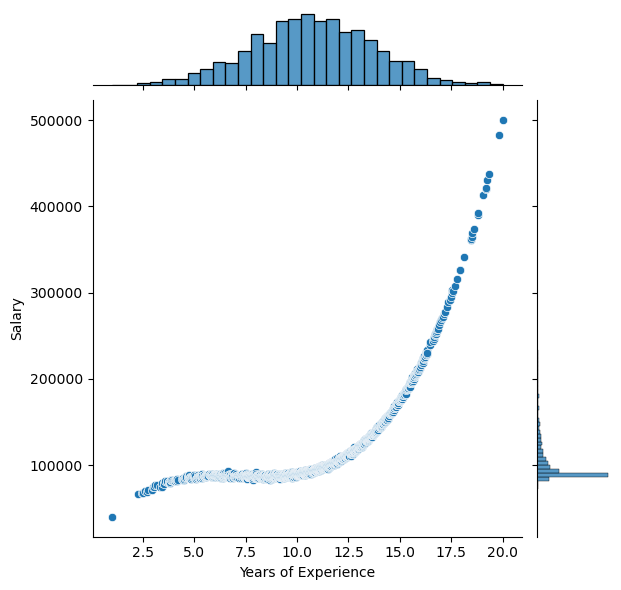

In [10]:
sns.jointplot(x='Years of Experience',y='Salary',data=salary)

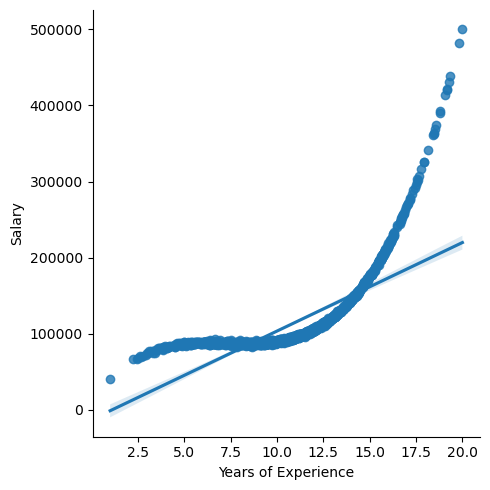

In [11]:
sns.lmplot(x='Years of Experience',y='Salary',data=salary)

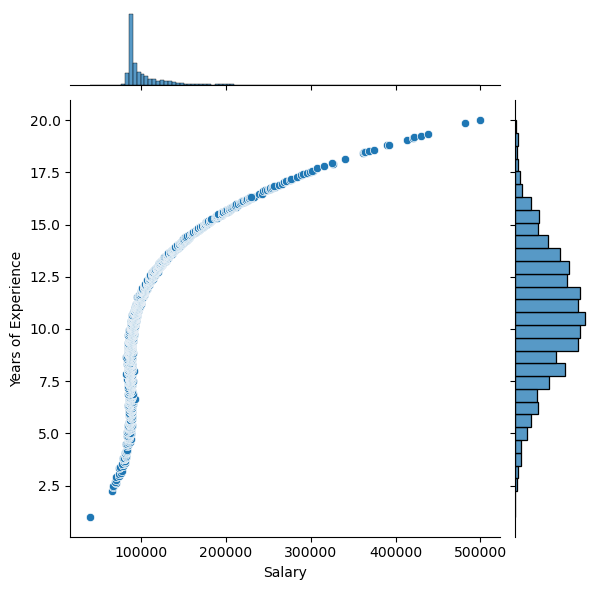

In [12]:
sns.jointplot(x='Salary',y='Years of Experience',data=salary)

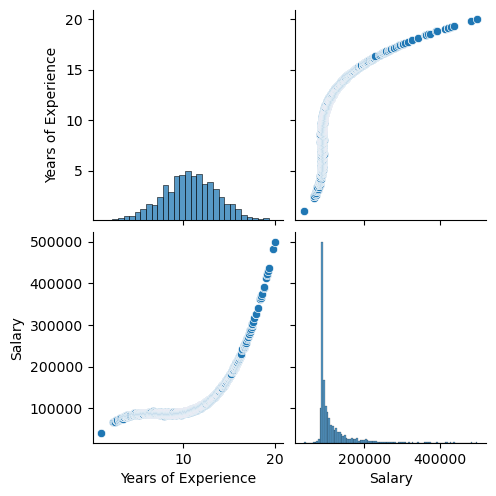

In [13]:
sns.pairplot(salary)

# Task#4: Create Training Dataset

In [15]:
X=salary[['Years of Experience']]

In [16]:
X

,Years of Experience
0,1.000000
1,2.257942
2,2.450875
3,2.498713
4,2.613729
...,...
1995,19.178575
1996,19.254499
1997,19.353369
1998,19.842520


In [17]:
X.shape

(2000, 1)

In [18]:
y=salary[['Salary']]

In [19]:
y.shape

(2000, 1)

In [20]:
y

,Salary
0,40000.00000
1,65979.42119
2,67253.57549
3,67342.43510
4,70532.20448
...,...
1995,421534.69100
1996,430478.02650
1997,438090.84540
1998,482242.16080


In [21]:
X_train=X

In [22]:
y_train=y

# (Solution#1: Linear Assumption)

# Task#5: Model Training

In [23]:
X_train.shape

(2000, 1)

In [24]:
y_train.shape

(2000, 1)

In [26]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)

LinearRegression()

In [27]:
print('Linear model cofficient(m):',regressor.coef_)
print('Linear model intercept(b):',regressor.intercept_)

Linear model cofficient(m): [[11640.22916165]]
Linear model intercept(b): [-13063.09931519]


In [28]:
#if fit_intercept=false,(no intercept)
regressor=LinearRegression(fit_intercept=False)
regressor.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [29]:
print('Linear model cofficient(m):',regressor.coef_)
print('Linear model intercept(b):',regressor.intercept_)

Linear model cofficient(m): [[10511.28514602]]
Linear model intercept(b): 0.0


In [30]:
#reverting to fit_intercept=True
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)
print('Linear model cofficient(m):',regressor.coef_)
print('Linear model intercept(b):',regressor.intercept_)

Linear model cofficient(m): [[11640.22916165]]
Linear model intercept(b): [-13063.09931519]


# Task#6: Visualizing the Results

Text(0.5, 1.0, 'Salary vs years of Experience(Linear)')

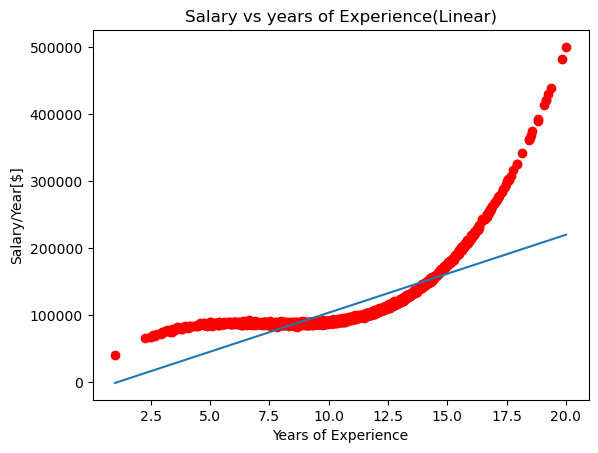

In [33]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train))
plt.xlabel('Years of Experience')
plt.ylabel('Salary/Year[$]')
plt.title('Salary vs years of Experience(Linear)')

# (Solution#2: Polynomial Assumption)

# Task#5: Model Training

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
poly_regressor=PolynomialFeatures(degree=2)

In [36]:
X_columns = poly_regressor.fit_transform(X_train)

In [47]:
print(X_columns)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.25794198e+00 5.09830199e+00 1.15116701e+01]
 [1.00000000e+00 2.45087546e+00 6.00679053e+00 1.47218955e+01]
 ...
 [1.00000000e+00 1.93533688e+01 3.74552884e+02 7.24886009e+03]
 [1.00000000e+00 1.98425197e+01 3.93725587e+02 7.81250771e+03]
 [1.00000000e+00 2.00000000e+01 4.00000000e+02 8.00000000e+03]]


In [38]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression()

In [40]:
print('Model Coefficients: ', regressor.coef_)
print('Model Intercept:',regressor.intercept_)

Model Coefficients:  [[     0.         -33106.32895617   2095.78613853]]
Model Intercept: [207045.95366531]


# Task#6: Validate the Result

In [41]:
X_train.shape

(2000, 1)

In [42]:
y_predict = regressor.predict(poly_regressor.fit_transform(X_train))

In [43]:
y_predict.shape

(2000, 1)

Text(0.5, 1.0, 'Salary vs. Years of Experience (Training dataset)')

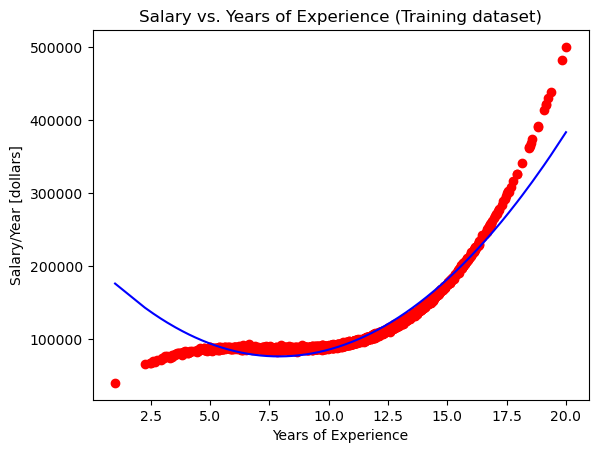

In [44]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_predict, color = 'blue')
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('Salary vs. Years of Experience (Training dataset)')

In [45]:
#Trying by increasing the degree of polynomial as 3
poly_regressor=PolynomialFeatures(degree=3)
X_columns = poly_regressor.fit_transform(X_train)

In [48]:
print(X_columns)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.25794198e+00 5.09830199e+00 1.15116701e+01]
 [1.00000000e+00 2.45087546e+00 6.00679053e+00 1.47218955e+01]
 ...
 [1.00000000e+00 1.93533688e+01 3.74552884e+02 7.24886009e+03]
 [1.00000000e+00 1.98425197e+01 3.93725587e+02 7.81250771e+03]
 [1.00000000e+00 2.00000000e+01 4.00000000e+02 8.00000000e+03]]


In [49]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression()

In [50]:
print('Model Coefficients: ', regressor.coef_)
print('Model Intercept:',regressor.intercept_)

Model Coefficients:  [[    0.         32261.24327461 -4503.00578987   205.20736238]]
Model Intercept: [12053.10740863]


# Validating the Result

In [51]:
X_train.shape

(2000, 1)

In [52]:
y_predict = regressor.predict(poly_regressor.fit_transform(X_train))

In [53]:
y_predict.shape

(2000, 1)

Text(0.5, 1.0, 'Salary vs. Years of Experience (Training dataset)')

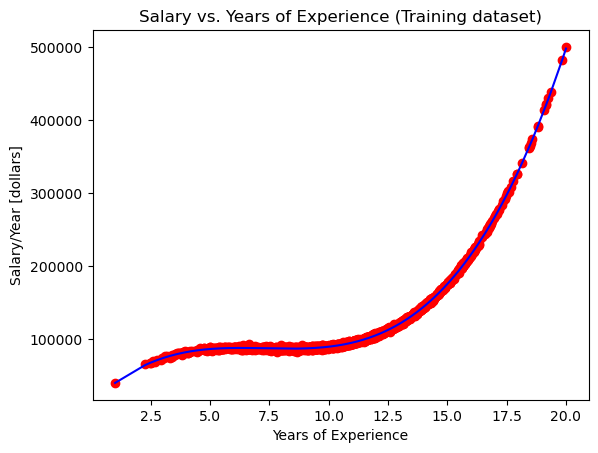

In [54]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_predict, color = 'blue')
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('Salary vs. Years of Experience (Training dataset)')